https://adventofcode.com/2022/day/12

In [1]:
import itertools as it
from math import inf
from typing import NamedTuple
from string import ascii_lowercase

import numpy as np
import networkx as nx

Node = tuple[int, int]


class Heightmap(NamedTuple):
    array: np.array
    graph: nx.DiGraph
    start: Node
    end: Node


def parseHeightmap(input_file: str) -> Heightmap:
    with open(input_file) as f:
        lines = f.readlines()

    def mapCharToHeight(c: str) -> int:
        if c in ascii_lowercase:
            h = ord(c) - 96
        elif c == "S":
            h = 0
        elif c == "E":
            h = 27
        return h

    arr = np.zeros((len(lines), len(lines[0].strip())))
    for row, l in enumerate(lines):
        for col, c in enumerate(l.strip()):
            arr[row, col] = mapCharToHeight(c)
            if c == "S":
                start = (col, row)
            elif c == "E":
                end = (col, row)

    def getEdgeCost(u: Node, v: Node) -> float:
        if arr[v[1], v[0]] <= (arr[u[1], u[0]] + 1):
            return 1
        else:
            return inf

    graph = nx.DiGraph()
    for y, x in it.product(*map(range, arr.shape)):
        u = (x, y)
        if x > 0:
            v = (x - 1, y)
            graph.add_edge(u, v, cost=getEdgeCost(u, v))
        if (x + 1) < arr.shape[1]:
            v = (x + 1, y)
            graph.add_edge(u, v, cost=getEdgeCost(u, v))
        if y > 0:
            v = (x, y - 1)
            graph.add_edge(u, v, cost=getEdgeCost(u, v))
        if (y + 1) < arr.shape[0]:
            v = (x, y + 1)
            graph.add_edge(u, v, cost=getEdgeCost(u, v))

    return Heightmap(array=arr, graph=graph, start=start, end=end)


def solvePart1(heightmap: Heightmap) -> int:
    length = nx.shortest_path_length(
        heightmap.graph, source=heightmap.start, target=heightmap.end, weight="cost"
    )
    return length


def solvePart2(heightmap: Heightmap) -> int:
    starts = [
        (x, y)
        for y, x in it.product(*map(range, heightmap.array.shape))
        if heightmap.array[y, x] <= 1
    ]
    lengths = [
        nx.shortest_path_length(heightmap.graph, source=start, target=heightmap.end, weight="cost")
        for start in starts
    ]
    return min(lengths)


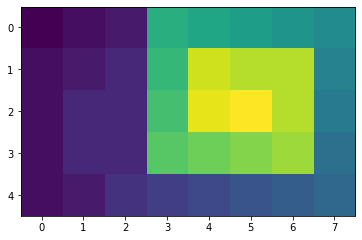

In [2]:
import matplotlib.pyplot as plt

heightmap = parseHeightmap("test_input.txt")
plt.imshow(heightmap.array)

result, expected = solvePart1(heightmap), 31
assert result == expected, f"Part 1: {result=} is wrong ({expected=})"

result, expected = solvePart2(heightmap), 29
assert result == expected, f"Part 2: {result=} is wrong ({expected=})"


341
↪ actual solution was 339 (lucky guess following the hint that my solution was too high)

334
↪ actual solution was 332 (lucky guess following the hint that my solution was too high)



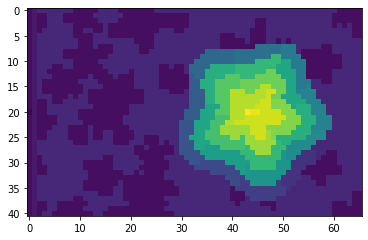

In [3]:
heightmap = parseHeightmap("input.txt")
plt.imshow(heightmap.array)

print(solvePart1(heightmap))
print("↪ actual solution was 339 (lucky guess following the hint that my solution was too high)\n")
print(solvePart2(heightmap))
print("↪ actual solution was 332 (lucky guess following the hint that my solution was too high)\n")